# Machine Learning Examination - Question 2

**DOCUMENTATION DONE AT THE VERY BOTTOM.**

In [1]:
# Imports
% matplotlib notebook
import os
import time
import numpy as np
import scipy as sp
import warnings as ws
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score as r_s
from sklearn.metrics import precision_score as p_s
from sklearn.metrics import accuracy_score as a_s
from sklearn.metrics import confusion_matrix as c_m

In [2]:
# Fetch Dataset Location
data_path = '.\\Exam Datasets'
filename = 'classification_data.tsv'
data_file = os.path.join(data_path, filename)

In [3]:
# Get the Dataset
dataset = pd.read_csv(data_file, sep='\t')

<IPython.core.display.Javascript object>


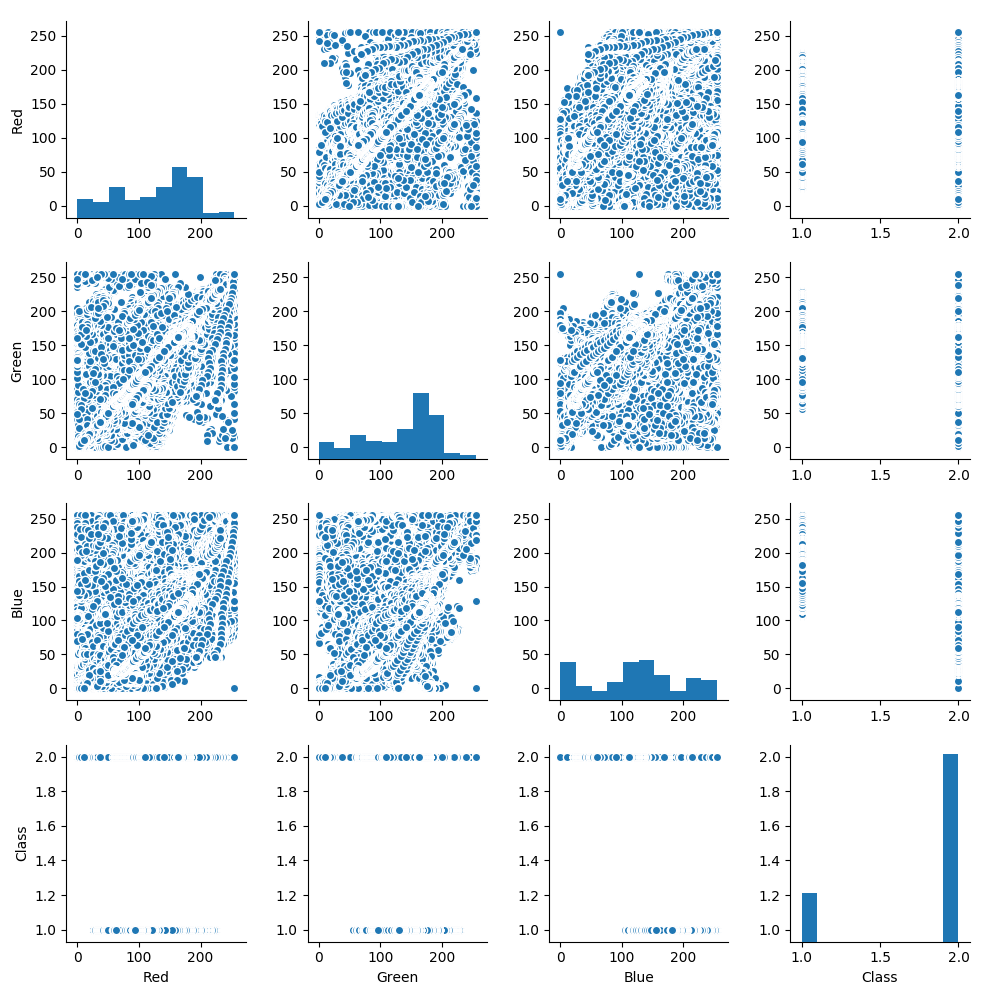

In [4]:
# Plot Dataset
sns.pairplot(dataset) # Scatters and Histograms

In [5]:
# Dataset Visualization and Analysis
data_head = dataset.head()
print ('\n Dataset Head :')
print (data_head)
data_tail = dataset.tail()
print ('\n Dataset Tail :')
print (data_tail)
data_desc = dataset.describe()
print ('\n Dataset Description :')
print (data_desc)
data_corr = dataset.corr()
print ('\n Dataset Correlation :')
print (data_corr)


 Dataset Head :
   Red  Green  Blue  Class
0   74     85   123      1
1   73     84   122      1
2   72     83   121      1
3   70     81   119      1
4   70     81   119      1

 Dataset Tail :
        Red  Green  Blue  Class
245052  163    162   112      2
245053  163    162   112      2
245054  163    162   112      2
245055  163    162   112      2
245056  255    255   255      2

 Dataset Description :
                 Red          Green           Blue          Class
count  245057.000000  245057.000000  245057.000000  245057.000000
mean      125.065446     132.507327     123.177151       1.792461
std        62.255653      59.941197      72.562165       0.405546
min         0.000000       0.000000       0.000000       1.000000
25%        68.000000      87.000000      70.000000       2.000000
50%       139.000000     153.000000     128.000000       2.000000
75%       176.000000     177.000000     164.000000       2.000000
max       255.000000     255.000000     255.000000       2.0

<IPython.core.display.Javascript object>


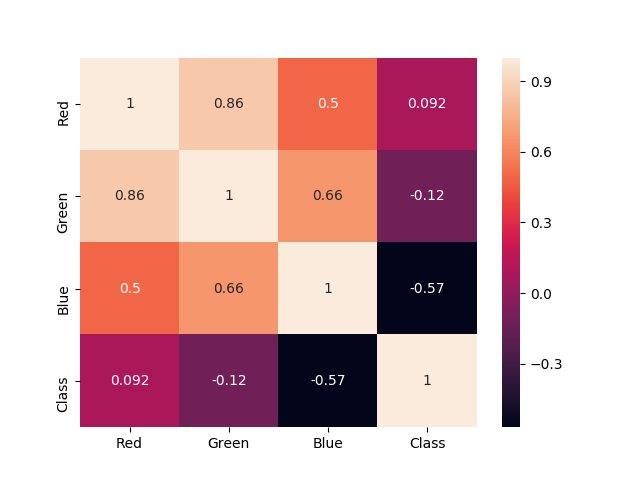

In [6]:
# HeatMap Figure of Correlation of Selected Features
plt.figure()
sns.heatmap(data_corr, annot=True)

In [7]:
# Shuffling Dataset to Desquence any Ordered Data
dataset = shuffle(dataset)

In [8]:
# Dataset is Sampled Down to 300 to Show the Execution
# Time Taken for Entire Dataset is 7 Hours
dataset = dataset[0 : 300]

In [9]:
# Split the Initial Dataset to Specified Batches - Only for Kernel Ridge Regression
def split_batches(dataset, num_batches):
    l = dataset.shape[0]
    s = 1.0 / num_batches
    batches = []
    for b in range(num_batches):
        batch = dataset[int(b * s * l) : int((b + 1) * s * l)]
        batches.append(batch)
    return batches

In [10]:
#  A Function to Split Dataset to Train and Test Sets
def train_test_split(dataset):
    percent = 0.80
    data_train = dataset[ : int(percent * dataset.shape[0])]
    data_test = dataset[int(percent * dataset.shape[0]) : ]
    return data_train, data_test

In [11]:
# A Function to Split Passed Dataset to K-Folds.
def split_kfold(dataset, folds):
    l = dataset.shape[0]
    s = (1.0 / folds)
    splits = []
    for k in range(folds):
        split = dataset[int(k * s * l) : int((k + 1) * s * l)]
        splits.append(split)
    return splits

In [12]:
# A Function to Obtain the Features and Target List
def get_X_Y(dataset):
    X = np.asarray([[row['Red'], row['Blue'], 
                     row['Green']] for index, row in dataset.iterrows()])
    Y = np.asarray([row['Class'] for index, row in dataset.iterrows()])
    return X, Y

In [13]:
# Spliting the Dataset
# Initial Split of Dataset to Train and Test
data_cv, data_test = train_test_split(dataset)
# Obtaining Cross Validation Splits for CV Dataset
cv_splits = split_kfold(data_cv, 5)
# Obtaining Train Features and Target
cv_train_X, cv_train_Y = get_X_Y(data_cv)
# Obtaining Test Features and Target
test_X, test_Y = get_X_Y(data_test)

# Initial Split of Dataset to Specified Batches to Avoid Memory Error
# Only for the Case of Kernel Ridge Regression
# Dataset of 245057 Rows Split into 25 Batches
# Trained on First 24 Batches and Tested on Last Batch
data_batches = split_batches(dataset, 25)
# About 96% Train and 4% Test - due to vastness of dataset
# Rows per Batch ~ 9802

In [14]:
# Ignore all Underflow Warnings : Value close to Zero - No Accuracy Errors
np.seterr(under='ignore')
sp.seterr(under='ignore')
ws.simplefilter('ignore')

**Linear Kernel Ridge Regression - Classification**

In [15]:
# Linear Kernel Ridge Regression
print ()
# Functions and Parameters
alphas = [1.0]
hyperparams = {'alpha' : alphas}
recs, precs, accs = [], [], []
lin_krr = KernelRidge(alpha=alphas, kernel='linear')
# Linear KRR Initializer
lin_krr_clf = GridSearchCV(lin_krr, hyperparams, cv=5)

In [16]:
# Batch Train, Test and Results
tab = time.time()
for b in range(len(data_batches[0 : -1])): # Upto Last but One Batches
    tb = time.time()
    print (('~' * 10) + (' Data Batch : %d ' % (b + 1)) + ('~' * 10))
    batch_train, batch_test = train_test_split(data_batches[b])
    
    # Get Batch Train and Test Split
    cv_train_X, cv_train_Y = get_X_Y(batch_train)
    test_X, test_Y = get_X_Y(batch_test)
    
    # Train
    tlb = time.time()
    lin_krr_fit = lin_krr_clf.fit(cv_train_X, cv_train_Y)
    tlb = time.time() - tlb
    print ('Time Taken To Train Batch : %f Secs.' % tlb)
    lin_krr_res = lin_krr_clf.cv_results_
    print ('Linear KRR Batch CV Results : \n', lin_krr_res)
    lin_krr_params = lin_krr_clf.best_params_
    print ('Linear KRR Batch Best Parameters : \n', lin_krr_params)
    lin_krr_score = lin_krr_clf.best_score_
    print ('Linear KRR Batch Best Score : \n', lin_krr_score)
    print ()

    # Test and Results
    tlb = time.time()
    test_pred = lin_krr_clf.predict(test_X)
    tlb = time.time() - tlb
    print ('Time Taken To Test Batch : %f Secs.' % tlb)
    # Round Test Predictions to Avoid Multiclass Continuous Targets Error
    test_pred = np.round(test_pred)
    # The Best Estimator
    print ('Batch Test Estimator : \n', lin_krr_clf.best_estimator_)
    # Recall Score
    recall = r_s(test_Y, test_pred, average='micro')
    print ('Batch Recall Score : \n', recall)
    # Precision Score
    precision = p_s(test_Y, test_pred, average='micro')
    print ('Batch Precision Score : \n', precision)
    # Accuracy Score
    accuracy = a_s(test_Y, test_pred)
    print ('Batch Accuracy Score : \n', accuracy)
    # Confusion Matix
    print ('Batch Confusion Matrix : \n', c_m(test_Y, test_pred))
    recs.append(recall)
    precs.append(precision)
    accs.append(accuracy)
    
    tb = time.time() - tb
    print ('Time Taken To Execute Batch : %f Secs.' % tb)
    print ()

tab = time.time() - tab
print ('Time Taken To Execute All Batches : %f Secs.' % tab)
print ()

~~~~~~~~~~ Data Batch : 1 ~~~~~~~~~~
Time Taken To Train Batch : 0.018013 Secs.
Linear KRR Batch CV Results : 
 {'mean_fit_time': array([ 0.00220165]), 'std_fit_time': array([ 0.00440331]), 'mean_score_time': array([ 0.00020013]), 'std_score_time': array([ 0.00040026]), 'param_alpha': masked_array(data = [1.0],
             mask = [False],
       fill_value = ?)
, 'params': [{'alpha': 1.0}], 'split0_test_score': array([ 0.]), 'split1_test_score': array([ 0.]), 'split2_test_score': array([ 0.]), 'split3_test_score': array([ 0.]), 'split4_test_score': array([ 0.]), 'mean_test_score': array([ 0.]), 'std_test_score': array([ 0.]), 'rank_test_score': array([1]), 'split0_train_score': array([ 0.]), 'split1_train_score': array([ 0.]), 'split2_train_score': array([ 0.]), 'split3_train_score': array([ 0.]), 'split4_train_score': array([ 0.]), 'mean_train_score': array([ 0.]), 'std_train_score': array([ 0.])}
Linear KRR Batch Best Parameters : 
 {'alpha': 1.0}
Linear KRR Batch Best Score : 
 0.0

 0.666666666667
Batch Accuracy Score : 
 0.666666666667
Batch Confusion Matrix : 
 [[0 0 0]
 [0 1 0]
 [1 0 1]]
Time Taken To Execute Batch : 0.015998 Secs.

~~~~~~~~~~ Data Batch : 10 ~~~~~~~~~~
Time Taken To Train Batch : 0.009006 Secs.
Linear KRR Batch CV Results : 
 {'mean_fit_time': array([ 0.00059724]), 'std_fit_time': array([ 0.00048769]), 'mean_score_time': array([ 0.00020361]), 'std_score_time': array([ 0.00040722]), 'param_alpha': masked_array(data = [1.0],
             mask = [False],
       fill_value = ?)
, 'params': [{'alpha': 1.0}], 'split0_test_score': array([-0.8880632]), 'split1_test_score': array([ 0.]), 'split2_test_score': array([ 0.95595027]), 'split3_test_score': array([ 0.]), 'split4_test_score': array([ 0.]), 'mean_test_score': array([ 0.01508602]), 'std_test_score': array([ 0.61490252]), 'rank_test_score': array([1]), 'split0_train_score': array([-1.04483133]), 'split1_train_score': array([-1.11761638]), 'split2_train_score': array([-1.1245806]), 'split3_train_

In [17]:
# Calculation of Average Metrics after Evaluation of All Batches
print ('Average Test Recall Score : %f' % np.mean(recs))
print ('Average Test Precision Score : %f' % np.mean(precs))
print ('Average Test Accuracy Score : %f' % np.mean(accs))
print ()

Average Test Recall Score : 0.458333
Average Test Precision Score : 0.458333
Average Test Accuracy Score : 0.458333



In [18]:
# Final Batch Test and Results
final_test_X, final_test_Y = get_X_Y(data_batches[-1]) # Last Batch
tlfb = time.time()
final_test_pred = lin_krr_clf.predict(final_test_X)
tlfb = time.time() - tlfb
print ('Time Taken To Test : %f Secs.' % tlfb)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
final_test_pred = np.round(final_test_pred)
# The Best Estimator
print ('Test Estimator : \n', lin_krr_clf.best_estimator_)
# Recall Score
recall = r_s(final_test_Y, final_test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(final_test_Y, final_test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(final_test_Y, final_test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(final_test_Y, final_test_pred))
print ()

Time Taken To Test : 0.001001 Secs.
Test Estimator : 
 KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)
Recall Score : 
 0.416666666667
Precision Score : 
 0.416666666667
Accuracy Score : 
 0.416666666667
Confusion Matrix : 
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [3 0 1 0 0]
 [0 1 2 4 1]
 [0 0 0 0 0]]



**Polynomial Kernel Ridge Regression - Classification**

In [19]:
# Polynomial Kernel Ridge Regression
print ()
# Functions and Parameters
alphas = [1.0]
degs = [2.0, 3.0] # M
hyperparams = {'alpha' : alphas, 'degree' : degs}
recs, precs, accs = [], [], []
poly_krr = KernelRidge(kernel='poly', alpha=alphas, degree=degs, gamma=1, coef0=1)
# Polynomial KRR Initializer
poly_krr_clf = GridSearchCV(poly_krr, hyperparams, cv=5)

In [20]:
# Batch Train, Test and Results
tab = time.time()
for b in range(len(data_batches[0 : -1])): # Upto Last but One Batches
    tb = time.time()
    print (('~' * 10) + (' Data Batch : %d ' % (b + 1)) + ('~' * 10))
    batch_train, batch_test = train_test_split(data_batches[b])
    
    # Get Batch Train and Test Split
    cv_train_X, cv_train_Y = get_X_Y(batch_train)
    test_X, test_Y = get_X_Y(batch_test)


    # Train
    tpb = time.time()
    poly_krr_fit = poly_krr_clf.fit(cv_train_X, cv_train_Y)
    tpb = time.time() - tpb
    print ('Time Taken To Train Batch : %f Secs.' % tpb)
    poly_krr_res = poly_krr_clf.cv_results_
    print ('Polynomial KRR Batch CV Results : \n', poly_krr_res)
    poly_krr_params = poly_krr_clf.best_params_
    print ('Polynomial KRR Batch Best Parameters : \n', poly_krr_params)
    poly_krr_score = poly_krr_clf.best_score_
    print ('Polynomial KRR Batch Best Score : \n', poly_krr_score)
    print ()

    # Test and Results
    tpb = time.time()
    test_pred = poly_krr_clf.predict(test_X)
    tpb = time.time() - tpb
    print ('Time Taken To Test Batch : %f Secs.' % tpb)
    # Round Test Predictions to Avoid Multiclass Continuous Targets Error
    test_pred = np.round(test_pred)
    # The Best Estimator
    print ('Batch Test Estimator : \n', poly_krr_clf.best_estimator_)
    # Recall Score
    recall = r_s(test_Y, test_pred, average='micro')
    print ('Batch Recall Score : \n', recall)
    # Precision Score
    precision = p_s(test_Y, test_pred, average='micro')
    print ('Batch Precision Score : \n', precision)
    # Accuracy Score
    accuracy = a_s(test_Y, test_pred)
    print ('Batch Accuracy Score : \n', accuracy)
    # Confusion Matix
    print ('Batch Confusion Matrix : \n', c_m(test_Y, test_pred))
    recs.append(recall)
    precs.append(precision)
    accs.append(accuracy)
    
    tb = time.time() - tb
    print ('Time Taken To Execute Batch : %f Secs.' % tb)
    print ()

tab = time.time() - tab
print ('Time Taken To Execute All Batches : %f Secs.' % tab)
print ()

~~~~~~~~~~ Data Batch : 1 ~~~~~~~~~~
Time Taken To Train Batch : 0.013009 Secs.
Polynomial KRR Batch CV Results : 
 {'mean_fit_time': array([ 0.000599,  0.      ]), 'std_fit_time': array([ 0.00048909,  0.        ]), 'mean_score_time': array([ 0.,  0.]), 'std_score_time': array([ 0.,  0.]), 'param_alpha': masked_array(data = [1.0 1.0],
             mask = [False False],
       fill_value = ?)
, 'param_degree': masked_array(data = [2.0 3.0],
             mask = [False False],
       fill_value = ?)
, 'params': [{'alpha': 1.0, 'degree': 2.0}, {'alpha': 1.0, 'degree': 3.0}], 'split0_test_score': array([ 0.,  0.]), 'split1_test_score': array([ 0.,  0.]), 'split2_test_score': array([ 0.,  0.]), 'split3_test_score': array([ 0.,  0.]), 'split4_test_score': array([ 0.,  0.]), 'mean_test_score': array([ 0.,  0.]), 'std_test_score': array([ 0.,  0.]), 'rank_test_score': array([1, 1]), 'split0_train_score': array([ 0.,  0.]), 'split1_train_score': array([ 0.,  0.]), 'split2_train_score': array([ 0

 0.0
Batch Precision Score : 
 0.0
Batch Accuracy Score : 
 0.0
Batch Confusion Matrix : 
 [[0 0 1]
 [0 0 2]
 [0 0 0]]
Time Taken To Execute Batch : 0.024019 Secs.

~~~~~~~~~~ Data Batch : 8 ~~~~~~~~~~
Time Taken To Train Batch : 0.019013 Secs.
Polynomial KRR Batch CV Results : 
 {'mean_fit_time': array([ 0.00059953,  0.00040021]), 'std_fit_time': array([ 0.00048951,  0.00049015]), 'mean_score_time': array([ 0.00060124,  0.00020008]), 'std_score_time': array([ 0.00049092,  0.00040016]), 'param_alpha': masked_array(data = [1.0 1.0],
             mask = [False False],
       fill_value = ?)
, 'param_degree': masked_array(data = [2.0 3.0],
             mask = [False False],
       fill_value = ?)
, 'params': [{'alpha': 1.0, 'degree': 2.0}, {'alpha': 1.0, 'degree': 3.0}], 'split0_test_score': array([ 0.,  0.]), 'split1_test_score': array([ -6.65599063e+02,  -9.30648028e+05]), 'split2_test_score': array([ 0.,  0.]), 'split3_test_score': array([  -1310.45419344, -490385.71781762]), 'split4_t

 KernelRidge(alpha=1.0, coef0=1, degree=2.0, gamma=1, kernel='poly',
      kernel_params=None)
Batch Recall Score : 
 0.0
Batch Precision Score : 
 0.0
Batch Accuracy Score : 
 0.0
Batch Confusion Matrix : 
 [[0 1 1 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]]
Time Taken To Execute Batch : 0.021029 Secs.

~~~~~~~~~~ Data Batch : 17 ~~~~~~~~~~
Time Taken To Train Batch : 0.016000 Secs.
Polynomial KRR Batch CV Results : 
 {'mean_fit_time': array([ 0.00039992,  0.0004003 ]), 'std_fit_time': array([ 0.0004898 ,  0.00049027]), 'mean_score_time': array([ 0.00040021,  0.00020013]), 'std_score_time': array([ 0.00049015,  0.00040026]), 'param_alpha': masked_array(data = [1.0 1.0],
             mask = [False False],
       fill_value = ?)
, 'param_degree': masked_array(data = [2.0 3.0],
             mask = [False False],
       fill_value = ?)
, 'params': [{'alpha': 1.0, 'degree': 2.0}, {'alpha': 1.0, 'degree': 3.0}], 'split0_test_score': array([ 0.,  0.]), 'split1_test_score': array([ -1800.66396781, -

In [21]:
# Calculation of Average Metrics after Evaluation of All Batches
print ('Average Test Recall Score : %f' % np.mean(recs))
print ('Average Test Precision Score : %f' % np.mean(precs))
print ('Average Test Accuracy Score : %f' % np.mean(accs))
print ()

Average Test Recall Score : 0.388889
Average Test Precision Score : 0.388889
Average Test Accuracy Score : 0.388889



In [22]:
# Final Batch Test and Results
final_test_X, final_test_Y = get_X_Y(data_batches[-1]) # Last Batch
tpfb = time.time()
final_test_pred = poly_krr_clf.predict(final_test_X)
tpfb = time.time() - tpfb
print ('Time Taken To Test : %f Secs.' % tpfb)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
final_test_pred = np.round(final_test_pred)
# The Best Estimator
print ('Test Estimator : \n', poly_krr_clf.best_estimator_)
# Recall Score
recall = r_s(final_test_Y, final_test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(final_test_Y, final_test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(final_test_Y, final_test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(final_test_Y, final_test_pred))
print ()

Time Taken To Test : 0.000000 Secs.
Test Estimator : 
 KernelRidge(alpha=1.0, coef0=1, degree=2.0, gamma=1, kernel='poly',
      kernel_params=None)
Recall Score : 
 0.583333333333
Precision Score : 
 0.583333333333
Accuracy Score : 
 0.583333333333
Confusion Matrix : 
 [[0 0 0 0 0 0 0]
 [0 1 0 0 1 1 1]
 [1 0 6 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]



**Gaussian/RBF Kernel Ridge Regression - Classification**

In [23]:
# Gaussian/RBF Kernel Ridge Regression
print ()
# Functions and Parameters
alphas = [1.0]
sigmas = [0.1, 0.5, 1.0, 2.0, 4.0]
hyperparams = {'alpha' : alphas, 'gamma' : sigmas}
recs, precs, accs = [], [], []
rbf_krr = KernelRidge(kernel='rbf', alpha=alphas, gamma=sigmas)
# Gaussian/RBF KRR Initializer
rbf_krr_clf = GridSearchCV(rbf_krr, hyperparams, cv=5)

In [24]:
# Batch Train, Test and Results
tab = time.time()
for b in range(len(data_batches[0 : -1])): # Upto Last but One Batches
    tb = time.time()
    print (('~' * 10) + (' Data Batch : %d ' % (b + 1)) + ('~' * 10))
    batch_train, batch_test = train_test_split(data_batches[b])
    
    # Get Batch Train and Test Split
    cv_train_X, cv_train_Y = get_X_Y(batch_train)
    test_X, test_Y = get_X_Y(batch_test)

    # Train
    tgb = time.time()
    rbf_krr_fit = rbf_krr_clf.fit(cv_train_X, cv_train_Y)
    tgb = time.time() - tgb
    print ('Time Taken To Train Batch : %f Secs.' % tgb)
    rbf_krr_res = rbf_krr_clf.cv_results_
    print ('Gaussian KRR Batch CV Results : \n', rbf_krr_res)
    rbf_krr_params = rbf_krr_clf.best_params_
    print ('Gaussian KRR Batch Best Parameters : \n', rbf_krr_params)
    rbf_krr_score = rbf_krr_clf.best_score_
    print ('Gaussian KRR Batch Best Score : \n', rbf_krr_score)
    print ()

    # Test and Results
    tgb = time.time()
    test_pred = rbf_krr_clf.predict(test_X)
    tgb = time.time() - tgb
    print ('Time Taken To Test Batch : %f Secs.' % tgb)
    # Round Test Predictions to Avoid Multiclass Continuous Targets Error
    test_pred = np.round(test_pred)
    # The Best Estimator
    print ('Batch Test Estimator : \n', rbf_krr_clf.best_estimator_)
    # Recall Score
    recall = r_s(test_Y, test_pred, average='micro')
    print ('Batch Recall Score : \n', recall)
    # Precision Score
    precision = p_s(test_Y, test_pred, average='micro')
    print ('Batch Precision Score : \n', precision)
    # Accuracy Score
    accuracy = a_s(test_Y, test_pred)
    print ('Batch Accuracy Score : \n', accuracy)
    # Confusion Matix
    print ('Batch Confusion Matrix : \n', c_m(test_Y, test_pred))
    recs.append(recall)
    precs.append(precision)
    accs.append(accuracy)
    
    tb = time.time() - tb
    print ('Time Taken To Execute Batch : %f Secs.' % tb)
    print ()

tab = time.time() - tab
print ('Time Taken To Execute All Batches : %f Secs.' % tab)
print ()

~~~~~~~~~~ Data Batch : 1 ~~~~~~~~~~
Time Taken To Train Batch : 0.038029 Secs.
Gaussian KRR Batch CV Results : 
 {'mean_fit_time': array([ 0.00040016,  0.        ,  0.00019989,  0.00040026,  0.00020065]), 'std_fit_time': array([ 0.0004901 ,  0.        ,  0.00039978,  0.00049021,  0.00040131]), 'mean_score_time': array([ 0.00040054,  0.00060081,  0.00060048,  0.00020018,  0.00040021]), 'std_score_time': array([ 0.00049056,  0.00049056,  0.00049029,  0.00040035,  0.00049015]), 'param_alpha': masked_array(data = [1.0 1.0 1.0 1.0 1.0],
             mask = [False False False False False],
       fill_value = ?)
, 'param_gamma': masked_array(data = [0.1 0.5 1.0 2.0 4.0],
             mask = [False False False False False],
       fill_value = ?)
, 'params': [{'alpha': 1.0, 'gamma': 0.1}, {'alpha': 1.0, 'gamma': 0.5}, {'alpha': 1.0, 'gamma': 1.0}, {'alpha': 1.0, 'gamma': 2.0}, {'alpha': 1.0, 'gamma': 4.0}], 'split0_test_score': array([ 0.,  0.,  0.,  0.,  0.]), 'split1_test_score': array([ 0

Time Taken To Train Batch : 0.036014 Secs.
Gaussian KRR Batch CV Results : 
 {'mean_fit_time': array([ 0.00039797,  0.00020027,  0.00020022,  0.0001976 ,  0.00020013]), 'std_fit_time': array([ 0.00048745,  0.00040054,  0.00040045,  0.0003952 ,  0.00040026]), 'mean_score_time': array([ 0.00040379,  0.00040026,  0.0004003 ,  0.00040011,  0.00020018]), 'std_score_time': array([ 0.00049456,  0.00049021,  0.00049027,  0.00049004,  0.00040035]), 'param_alpha': masked_array(data = [1.0 1.0 1.0 1.0 1.0],
             mask = [False False False False False],
       fill_value = ?)
, 'param_gamma': masked_array(data = [0.1 0.5 1.0 2.0 4.0],
             mask = [False False False False False],
       fill_value = ?)
, 'params': [{'alpha': 1.0, 'gamma': 0.1}, {'alpha': 1.0, 'gamma': 0.5}, {'alpha': 1.0, 'gamma': 1.0}, {'alpha': 1.0, 'gamma': 2.0}, {'alpha': 1.0, 'gamma': 4.0}], 'split0_test_score': array([ 0.,  0.,  0.,  0.,  0.]), 'split1_test_score': array([-8.99998771, -9.        , -9.        , 

Time Taken To Train Batch : 0.037040 Secs.
Gaussian KRR Batch CV Results : 
 {'mean_fit_time': array([ 0.00040011,  0.00060081,  0.00039992,  0.00040007,  0.00019989]), 'std_fit_time': array([ 0.00049004,  0.00049056,  0.0004898 ,  0.00048998,  0.00039978]), 'mean_score_time': array([ 0.00040026,  0.00039988,  0.00020041,  0.00040026,  0.00019994]), 'std_score_time': array([ 0.00049021,  0.00048975,  0.00040083,  0.00049021,  0.00039988]), 'param_alpha': masked_array(data = [1.0 1.0 1.0 1.0 1.0],
             mask = [False False False False False],
       fill_value = ?)
, 'param_gamma': masked_array(data = [0.1 0.5 1.0 2.0 4.0],
             mask = [False False False False False],
       fill_value = ?)
, 'params': [{'alpha': 1.0, 'gamma': 0.1}, {'alpha': 1.0, 'gamma': 0.5}, {'alpha': 1.0, 'gamma': 1.0}, {'alpha': 1.0, 'gamma': 2.0}, {'alpha': 1.0, 'gamma': 4.0}], 'split0_test_score': array([ 0.,  0.,  0.,  0.,  0.]), 'split1_test_score': array([-8.99990045, -9.        , -9.        , 

Time Taken To Train Batch : 0.034031 Secs.
Gaussian KRR Batch CV Results : 
 {'mean_fit_time': array([ 0.0004003 ,  0.00040035,  0.00020013,  0.00039992,  0.00020041]), 'std_fit_time': array([ 0.00049027,  0.00049033,  0.00040026,  0.0004898 ,  0.00040083]), 'mean_score_time': array([ 0.00040021,  0.00040016,  0.0004004 ,  0.00020046,  0.0004003 ]), 'std_score_time': array([ 0.00049015,  0.0004901 ,  0.00049039,  0.00040092,  0.00049027]), 'param_alpha': masked_array(data = [1.0 1.0 1.0 1.0 1.0],
             mask = [False False False False False],
       fill_value = ?)
, 'param_gamma': masked_array(data = [0.1 0.5 1.0 2.0 4.0],
             mask = [False False False False False],
       fill_value = ?)
, 'params': [{'alpha': 1.0, 'gamma': 0.1}, {'alpha': 1.0, 'gamma': 0.5}, {'alpha': 1.0, 'gamma': 1.0}, {'alpha': 1.0, 'gamma': 2.0}, {'alpha': 1.0, 'gamma': 4.0}], 'split0_test_score': array([-9., -9., -9., -9., -9.]), 'split1_test_score': array([-9., -9., -9., -9., -9.]), 'split2_test

Time Taken To Train Batch : 0.034025 Secs.
Gaussian KRR Batch CV Results : 
 {'mean_fit_time': array([ 0.00040035,  0.00040021,  0.00060358,  0.00040417,  0.        ]), 'std_fit_time': array([ 0.00049033,  0.00049015,  0.00049284,  0.00049503,  0.        ]), 'mean_score_time': array([ 0.00020013,  0.00060043,  0.00020018,  0.00040011,  0.00020032]), 'std_score_time': array([ 0.00040026,  0.00049025,  0.00040035,  0.00049004,  0.00040064]), 'param_alpha': masked_array(data = [1.0 1.0 1.0 1.0 1.0],
             mask = [False False False False False],
       fill_value = ?)
, 'param_gamma': masked_array(data = [0.1 0.5 1.0 2.0 4.0],
             mask = [False False False False False],
       fill_value = ?)
, 'params': [{'alpha': 1.0, 'gamma': 0.1}, {'alpha': 1.0, 'gamma': 0.5}, {'alpha': 1.0, 'gamma': 1.0}, {'alpha': 1.0, 'gamma': 2.0}, {'alpha': 1.0, 'gamma': 4.0}], 'split0_test_score': array([ 0.,  0.,  0.,  0.,  0.]), 'split1_test_score': array([ 0.,  0.,  0.,  0.,  0.]), 'split2_test

Batch Confusion Matrix : 
 [[0 0 0]
 [0 0 0]
 [2 1 0]]
Time Taken To Execute Batch : 0.047033 Secs.

~~~~~~~~~~ Data Batch : 23 ~~~~~~~~~~
Time Taken To Train Batch : 0.037045 Secs.
Gaussian KRR Batch CV Results : 
 {'mean_fit_time': array([ 0.00040016,  0.00040145,  0.0004003 ,  0.00040007,  0.0004004 ]), 'std_fit_time': array([ 0.0004901 ,  0.00049176,  0.00049027,  0.00048998,  0.00049039]), 'mean_score_time': array([ 0.00060067,  0.0004005 ,  0.00040026,  0.00019684,  0.00020013]), 'std_score_time': array([ 0.00049045,  0.0004905 ,  0.00049021,  0.00039368,  0.00040026]), 'param_alpha': masked_array(data = [1.0 1.0 1.0 1.0 1.0],
             mask = [False False False False False],
       fill_value = ?)
, 'param_gamma': masked_array(data = [0.1 0.5 1.0 2.0 4.0],
             mask = [False False False False False],
       fill_value = ?)
, 'params': [{'alpha': 1.0, 'gamma': 0.1}, {'alpha': 1.0, 'gamma': 0.5}, {'alpha': 1.0, 'gamma': 1.0}, {'alpha': 1.0, 'gamma': 2.0}, {'alpha': 1.0,

In [25]:
# Calculation of Average Metrics after Evaluation of All Batches
print ('Average Test Recall Score : %f' % np.mean(recs))
print ('Average Test Precision Score : %f' % np.mean(precs))
print ('Average Test Accuracy Score : %f' % np.mean(accs))
print ()

Average Test Recall Score : 0.000000
Average Test Precision Score : 0.000000
Average Test Accuracy Score : 0.000000



In [26]:
# Final Batch Test and Results
final_test_X, final_test_Y = get_X_Y(data_batches[-1]) # Last Batch
tgfb = time.time()
final_test_pred = rbf_krr_clf.predict(final_test_X)
tgfb = time.time() - tgfb
print ('Time Taken To Test : %f Secs.' % tgfb)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
final_test_pred = np.round(final_test_pred)
# The Best Estimator
print ('Test Estimator : \n', rbf_krr_clf.best_estimator_)
# Recall Score
recall = r_s(final_test_Y, final_test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(final_test_Y, final_test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(final_test_Y, final_test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(final_test_Y, final_test_pred))
print ()

Time Taken To Test : 0.000000 Secs.
Test Estimator : 
 KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=0.1, kernel='rbf',
      kernel_params=None)
Recall Score : 
 0.0
Precision Score : 
 0.0
Accuracy Score : 
 0.0
Confusion Matrix : 
 [[0 0 0]
 [4 0 0]
 [7 1 0]]



**Logistic Regression - Classification**

In [27]:
# Logistic Regression
# Since The Dataset is Large - multi_class is set to 'multinomial' - and uses 'sag' as solver
mlr = LogisticRegression(multi_class='multinomial', solver='sag') # LogR Initializer

In [28]:
# Train
tmlr = time.time()
print ()
recs, precs, accs = [], [], []
for i in range(len(cv_splits)):
    print ('CV Epoch : ' + str(i + 1))
    cv_train, cv_test = train_test_split(cv_splits[i])
    cv_train_X, cv_train_Y = get_X_Y(cv_train)
    cv_test_X, cv_test_Y = get_X_Y(cv_test)
    lr_fit = mlr.fit(cv_train_X, cv_train_Y)
    cv_pred = mlr.predict(cv_test_X)
    # The Coefficients
    print ('Coefficients : \n', mlr.coef_)
    # Round Test Predictions to Avoid Multiclass Continuous Targets Error
    cv_pred = np.round(cv_pred)
    # Recall Score
    recall = r_s(cv_test_Y, cv_pred, average='micro')
    print ('Recall Score : \n', recall)
    # Precision Score
    precision = p_s(cv_test_Y, cv_pred, average='micro')
    print ('Precision Score : \n', precision)
    # Accuracy Score
    accuracy = a_s(cv_test_Y, cv_pred)
    print ('Accuracy Score : \n', accuracy)
    # Confusion Matix
    print ('Confusion Matrix : \n', c_m(cv_test_Y, cv_pred))
    recs.append(recall)
    precs.append(precision)
    accs.append(accuracy)
    print ()
tmlr = time.time() - tmlr
print ('Time Taken To Train : %f Secs.' % tmlr)


CV Epoch : 1
Coefficients : 
 [[ 0.01357083 -0.01752314  0.0100933 ]]
Recall Score : 
 1.0
Precision Score : 
 1.0
Accuracy Score : 
 1.0
Confusion Matrix : 
 [[10]]

CV Epoch : 2
Coefficients : 
 [[ 0.01084715 -0.0100418   0.00330691]]
Recall Score : 
 0.9
Precision Score : 
 0.9
Accuracy Score : 
 0.9
Confusion Matrix : 
 [[2 0]
 [1 7]]

CV Epoch : 3
Coefficients : 
 [[-0.00755584 -0.02694627  0.04032154]]
Recall Score : 
 1.0
Precision Score : 
 1.0
Accuracy Score : 
 1.0
Confusion Matrix : 
 [[10]]

CV Epoch : 4
Coefficients : 
 [[ 0.01891012 -0.01768029  0.00454995]]
Recall Score : 
 0.8
Precision Score : 
 0.8
Accuracy Score : 
 0.8
Confusion Matrix : 
 [[4 0]
 [2 4]]

CV Epoch : 5
Coefficients : 
 [[ 0.03247368 -0.00701386 -0.01481745]]
Recall Score : 
 0.8
Precision Score : 
 0.8
Accuracy Score : 
 0.8
Confusion Matrix : 
 [[1 1]
 [1 7]]

Time Taken To Train : 0.076041 Secs.


In [29]:
# Calculation of Average Metrics after CV
print ('Average Recall Score : %f' % np.mean(recs))
print ('Average Precision Score : %f' % np.mean(precs))
print ('Average Accuracy Score : %f' % np.mean(accs))
print ()

Average Recall Score : 0.900000
Average Precision Score : 0.900000
Average Accuracy Score : 0.900000



In [30]:
# Test and Results
tmlr = time.time()
test_pred = mlr.predict(test_X)
tmlr = time.time() - tmlr
print ('Time Taken To Test : %f Secs.' % tmlr)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Coefficients
print ('Test Coefficients : \n', mlr.coef_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.000000 Secs.
Test Coefficients : 
 [[ 0.03247368 -0.00701386 -0.01481745]]
Recall Score : 
 1.0
Precision Score : 
 1.0
Accuracy Score : 
 1.0
Confusion Matrix : 
 [[3]]



**Linear Support Vector Machine Classification - Hard Margin**

In [31]:
# Linear Support Vector Classification
print ()
# Functions and Parameters
cs = [1000.0]
lin_svc = SVC(C=cs, kernel='linear', cache_size=4096)
hyperparams = {'C' : cs}
# Linear SVC Initializer
lin_svc_clf = GridSearchCV(lin_svc, hyperparams, cv=5)

In [32]:
# Train
tl = time.time()
lin_svc_fit = lin_svc_clf.fit(cv_train_X, cv_train_Y)
tl = time.time() - tl
print ('Time Taken To Train : %f Secs.' % tl)
lin_svc_res = lin_svc_clf.cv_results_
print ('Linear SVC CV Results : \n', lin_svc_res)
lin_svc_params = lin_svc_clf.best_params_
print ('Linear SVC Best Parameters : \n', lin_svc_params)
lin_svc_score = lin_svc_clf.best_score_
print ('Linear SVC Best Score : \n', lin_svc_score)
print ()

Time Taken To Train : 87.203503 Secs.
Linear SVC CV Results : 
 {'mean_fit_time': array([ 9.17881184]), 'std_fit_time': array([ 15.07265141]), 'mean_score_time': array([ 0.00020013]), 'std_score_time': array([ 0.00040026]), 'param_C': masked_array(data = [1000.0],
             mask = [False],
       fill_value = ?)
, 'params': [{'C': 1000.0}], 'split0_test_score': array([ 1.]), 'split1_test_score': array([ 0.75]), 'split2_test_score': array([ 0.85714286]), 'split3_test_score': array([ 0.85714286]), 'split4_test_score': array([ 1.]), 'mean_test_score': array([ 0.89473684]), 'std_test_score': array([ 0.09796101]), 'rank_test_score': array([1]), 'split0_train_score': array([ 0.96551724]), 'split1_train_score': array([ 0.96666667]), 'split2_train_score': array([ 1.]), 'split3_train_score': array([ 0.96774194]), 'split4_train_score': array([ 0.96774194]), 'mean_train_score': array([ 0.97353356]), 'std_train_score': array([ 0.01325876])}
Linear SVC Best Parameters : 
 {'C': 1000.0}
Linear SV

In [33]:
# Test and Results
tl = time.time()
test_pred = lin_svc_clf.predict(test_X)
tl = time.time() - tl
print ('Time Taken To Test : %f Secs.' % tl)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Best Estimator
print ('Test Estimator : \n', lin_svc_clf.best_estimator_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.000000 Secs.
Test Estimator : 
 SVC(C=1000.0, cache_size=4096, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Recall Score : 
 1.0
Precision Score : 
 1.0
Accuracy Score : 
 1.0
Confusion Matrix : 
 [[3]]



**Polynomial Support Vector Machine Classification - Hard Margin**

In [34]:
# Polynomial Support Vector Classification
print ()
# Functions and Parameters
cs = [1000.0]
degs = [2.0, 3.0] # M
poly_svc = SVC(kernel='poly', C=cs, degree=degs, gamma=1, coef0=1, cache_size=4096)
hyperparams = {'C' : cs, 'degree' : degs}
# Polynomial SVC Initializer
poly_svc_clf = GridSearchCV(poly_svc, hyperparams, cv=5)

In [35]:
# Train
tp = time.time()
poly_svc_fit = poly_svc_clf.fit(cv_train_X, cv_train_Y)
tp = time.time() - tp
print ('Time Taken To Train : %f Secs.' % tp)
poly_svc_res = poly_svc_clf.cv_results_
print ('Polynomial SVC CV Results : \n', poly_svc_res)
poly_svc_params = poly_svc_clf.best_params_
print ('Polynomial SVC Best Parameters : \n', poly_svc_params)
poly_svc_score = poly_svc_clf.best_score_
print ('Polynomial SVC Best Score : \n', poly_svc_score)
print ()

Time Taken To Train : 0.021015 Secs.
Polynomial SVC CV Results : 
 {'mean_fit_time': array([ 0.00080132,  0.0004004 ]), 'std_fit_time': array([ 0.00040066,  0.00049039]), 'mean_score_time': array([ 0.00040007,  0.00020013]), 'std_score_time': array([ 0.00048998,  0.00040026]), 'param_C': masked_array(data = [1000.0 1000.0],
             mask = [False False],
       fill_value = ?)
, 'param_degree': masked_array(data = [2.0 3.0],
             mask = [False False],
       fill_value = ?)
, 'params': [{'C': 1000.0, 'degree': 2.0}, {'C': 1000.0, 'degree': 3.0}], 'split0_test_score': array([ 0.88888889,  0.88888889]), 'split1_test_score': array([ 1.,  1.]), 'split2_test_score': array([ 0.85714286,  0.85714286]), 'split3_test_score': array([ 1.,  1.]), 'split4_test_score': array([ 1.,  1.]), 'mean_test_score': array([ 0.94736842,  0.94736842]), 'std_test_score': array([ 0.06255631,  0.06255631]), 'rank_test_score': array([1, 1]), 'split0_train_score': array([ 1.,  1.]), 'split1_train_score':

In [36]:
# Test and Results
tp = time.time()
test_pred = poly_svc_clf.predict(test_X)
tp = time.time() - tp
print ('Time Taken To Test : %f Secs.' % tp)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Best Estimator
print ('Test Estimator : \n', poly_svc_clf.best_estimator_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.001002 Secs.
Test Estimator : 
 SVC(C=1000.0, cache_size=4096, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=2.0, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Recall Score : 
 1.0
Precision Score : 
 1.0
Accuracy Score : 
 1.0
Confusion Matrix : 
 [[3]]



**Gaussian/RBF Support Vector Machine Classification - Hard Margin**

In [37]:
# Gaussian/RBF Support Vector Classification
print ()
# Functions and Parameters
cs = [1000.0]
sigmas = [0.1, 0.5, 1.0, 2.0, 4.0]
hyperparams = {'C' : cs, 'gamma' : sigmas}
rbf_svc = SVC(kernel='rbf', C=cs, gamma=sigmas, cache_size=4096)
# Gaussian/RBF SVC Initializer
rbf_svc_clf = GridSearchCV(rbf_svc, hyperparams, cv=5)

In [38]:
# Train
tg = time.time()
rbf_svc_fit = rbf_svc_clf.fit(cv_train_X, cv_train_Y)
tg = time.time() - tg
print ('Time Taken To Train : %f Secs.' % tg)
rbf_svc_res = rbf_svc_clf.cv_results_
print ('Gaussian/RBF SVC CV Results : \n', rbf_svc_res)
rbf_svc_params = rbf_svc_clf.best_params_
print ('Gaussian/RBF SVC Best Parameters : \n', rbf_svc_params)
rbf_svc_score = rbf_svc_clf.best_score_
print ('Gaussian/RBF SVC Best Score : \n', rbf_svc_score)
print ()

Time Taken To Train : 0.077060 Secs.
Gaussian/RBF SVC CV Results : 
 {'mean_fit_time': array([ 0.0010006 ,  0.00079975,  0.00100026,  0.00100064,  0.00140157]), 'std_fit_time': array([  3.16297988e-07,   7.47971797e-04,   4.15696997e-07,
         5.22348936e-07,   4.91521180e-04]), 'mean_score_time': array([ 0.00100002,  0.0006001 ,  0.00020027,  0.00020037,  0.00039945]), 'std_score_time': array([ 0.00155   ,  0.00048998,  0.00040054,  0.00040073,  0.00048922]), 'param_C': masked_array(data = [1000.0 1000.0 1000.0 1000.0 1000.0],
             mask = [False False False False False],
       fill_value = ?)
, 'param_gamma': masked_array(data = [0.1 0.5 1.0 2.0 4.0],
             mask = [False False False False False],
       fill_value = ?)
, 'params': [{'C': 1000.0, 'gamma': 0.1}, {'C': 1000.0, 'gamma': 0.5}, {'C': 1000.0, 'gamma': 1.0}, {'C': 1000.0, 'gamma': 2.0}, {'C': 1000.0, 'gamma': 4.0}], 'split0_test_score': array([ 0.77777778,  0.77777778,  0.77777778,  0.77777778,  0.77777778]

In [39]:
# Test and Results
tg = time.time()
test_pred = rbf_svc_clf.predict(test_X)
tg = time.time() - tg
print ('Time Taken To Test : %f Secs.' % tg)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Best Estimator
print ('Test Estimator : \n', rbf_svc_clf.best_estimator_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.001000 Secs.
Test Estimator : 
 SVC(C=1000.0, cache_size=4096, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Recall Score : 
 1.0
Precision Score : 
 1.0
Accuracy Score : 
 1.0
Confusion Matrix : 
 [[3]]



**Linear Support Vector Machine Classification - Soft Margin**

In [40]:
# Linear Support Vector Classification
print ()
# Functions and Parameters
cs = [0.1, 0.5, 1.0, 2.0, 5.0]
lin_svc = SVC(C=cs, kernel='linear', cache_size=4096)
hyperparams = {'C' : cs}
# Linear SVC Initializer
lin_svc_clf = GridSearchCV(lin_svc, hyperparams, cv=5)

In [41]:
# Train
tl = time.time()
lin_svc_fit = lin_svc_clf.fit(cv_train_X, cv_train_Y)
tl = time.time() - tl
print ('Time Taken To Train : %f Secs.' % tl)
lin_svc_res = lin_svc_clf.cv_results_
print ('Linear SVC CV Results : \n', lin_svc_res)
lin_svc_params = lin_svc_clf.best_params_
print ('Linear SVC Best Parameters : \n', lin_svc_params)
lin_svc_score = lin_svc_clf.best_score_
print ('Linear SVC Best Score : \n', lin_svc_score)
print ()

Time Taken To Train : 0.473335 Secs.
Linear SVC CV Results : 
 {'mean_fit_time': array([ 0.00100121,  0.00240135,  0.01300969,  0.02261853,  0.04883471]), 'std_fit_time': array([  5.56082906e-07,   1.20071592e-03,   2.07030330e-02,
         3.78930262e-02,   7.49920641e-02]), 'mean_score_time': array([ 0.0004005 ,  0.00040059,  0.00060072,  0.00040054,  0.00040035]), 'std_score_time': array([ 0.0004905 ,  0.00049062,  0.00049049,  0.00049056,  0.00049033]), 'param_C': masked_array(data = [0.1 0.5 1.0 2.0 5.0],
             mask = [False False False False False],
       fill_value = ?)
, 'params': [{'C': 0.1}, {'C': 0.5}, {'C': 1.0}, {'C': 2.0}, {'C': 5.0}], 'split0_test_score': array([ 1.,  1.,  1.,  1.,  1.]), 'split1_test_score': array([ 0.75,  0.75,  0.75,  0.75,  0.75]), 'split2_test_score': array([ 0.85714286,  0.85714286,  0.85714286,  0.85714286,  0.85714286]), 'split3_test_score': array([ 0.85714286,  0.85714286,  0.85714286,  0.85714286,  0.85714286]), 'split4_test_score': arr

In [42]:
# Test and Results
tl = time.time()
test_pred = lin_svc_clf.predict(test_X)
tl = time.time() - tl
print ('Time Taken To Test : %f Secs.' % tl)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Best Estimator
print ('Test Estimator : \n', lin_svc_clf.best_estimator_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.001000 Secs.
Test Estimator : 
 SVC(C=0.1, cache_size=4096, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Recall Score : 
 1.0
Precision Score : 
 1.0
Accuracy Score : 
 1.0
Confusion Matrix : 
 [[3]]



**Polynomial Support Vector Machine Classification - Soft Margin**

In [43]:
# Polynomial Support Vector Classification
print ()
# Functions and Parameters
cs = [0.1, 0.5, 1.0, 2.0, 5.0]
degs = [2.0, 3.0] # M
poly_svc = SVC(kernel='poly', C=cs, degree=degs, gamma=1, coef0=1, cache_size=4096)
hyperparams = {'C' : cs, 'degree' : degs}
# Polynomial SVC Initializer
poly_svc_clf = GridSearchCV(poly_svc, hyperparams, cv=5)

In [44]:
# Train
tp = time.time()
poly_svc_fit = poly_svc_clf.fit(cv_train_X, cv_train_Y)
tp = time.time() - tp
print ('Time Taken To Train : %f Secs.' % tp)
poly_svc_res = poly_svc_clf.cv_results_
print ('Polynomial SVC CV Results : \n', poly_svc_res)
poly_svc_params = poly_svc_clf.best_params_
print ('Polynomial SVC Best Parameters : \n', poly_svc_params)
poly_svc_score = poly_svc_clf.best_score_
print ('Polynomial SVC Best Score : \n', poly_svc_score)
print ()

Time Taken To Train : 0.090046 Secs.
Polynomial SVC CV Results : 
 {'mean_fit_time': array([ 0.00020285,  0.00040021,  0.00079856,  0.00060039,  0.0004004 ,
        0.00020022,  0.00060043,  0.00039911,  0.00060034,  0.0004003 ]), 'std_fit_time': array([ 0.00040569,  0.00049016,  0.00039929,  0.00049021,  0.00049039,
        0.00040045,  0.00049025,  0.00048881,  0.00049017,  0.00049027]), 'mean_score_time': array([ 0.00060425,  0.00060062,  0.        ,  0.        ,  0.00040007,
        0.00020008,  0.00039787,  0.00080137,  0.00020022,  0.00020061]), 'std_score_time': array([ 0.00049342,  0.00049041,  0.        ,  0.        ,  0.00048998,
        0.00040016,  0.00048731,  0.0004007 ,  0.00040045,  0.00040121]), 'param_C': masked_array(data = [0.1 0.1 0.5 0.5 1.0 1.0 2.0 2.0 5.0 5.0],
             mask = [False False False False False False False False False False],
       fill_value = ?)
, 'param_degree': masked_array(data = [2.0 3.0 2.0 3.0 2.0 3.0 2.0 3.0 2.0 3.0],
             mask

In [45]:
# Test and Results
tp = time.time()
test_pred = poly_svc_clf.predict(test_X)
tp = time.time() - tp
print ('Time Taken To Test : %f Secs.' % tp)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Best Estimator
print ('Test Estimator : \n', poly_svc_clf.best_estimator_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.000000 Secs.
Test Estimator : 
 SVC(C=0.1, cache_size=4096, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=2.0, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Recall Score : 
 1.0
Precision Score : 
 1.0
Accuracy Score : 
 1.0
Confusion Matrix : 
 [[3]]



**Gaussian/RBF Support Vector Machine Classification - Soft Margin**

In [46]:
# Gaussian/RBF Support Vector Classification
print ()
# Functions and Parameters
cs = [0.1, 0.5, 1.0, 2.0, 5.0]
sigmas = [0.1, 0.5, 1.0, 2.0, 4.0]
hyperparams = {'C' : cs, 'gamma' : sigmas}
rbf_svc = SVC(kernel='rbf', C=cs, gamma=sigmas, cache_size=4096)
# Gaussian/RBF SVC Initializer
rbf_svc_clf = GridSearchCV(rbf_svc, hyperparams, cv=5)

In [47]:
# Train
tg = time.time()
rbf_svc_fit = rbf_svc_clf.fit(cv_train_X, cv_train_Y)
tg = time.time() - tg
print ('Time Taken To Train : %f Secs.' % tg)
rbf_svc_res = rbf_svc_clf.cv_results_
print ('Gaussian/RBF SVC CV Results : \n', rbf_svc_res)
rbf_svc_params = rbf_svc_clf.best_params_
print ('Gaussian/RBF SVC Best Parameters : \n', rbf_svc_params)
rbf_svc_score = rbf_svc_clf.best_score_
print ('Gaussian/RBF SVC Best Score : \n', rbf_svc_score)
print ()

Time Taken To Train : 0.215166 Secs.
Gaussian/RBF SVC CV Results : 
 {'mean_fit_time': array([ 0.0008009 ,  0.0006011 ,  0.0006001 ,  0.00040121,  0.00040064,
        0.0004004 ,  0.00040073,  0.00080061,  0.00040007,  0.00060024,
        0.0004004 ,  0.00020008,  0.00060029,  0.00040035,  0.00060034,
        0.00040016,  0.00060034,  0.00060053,  0.0004003 ,  0.00060062,
        0.00040011,  0.00080037,  0.00059977,  0.00060043,  0.00060048]), 'std_fit_time': array([ 0.00040045,  0.0004908 ,  0.00048998,  0.00049139,  0.00049068,
        0.00049039,  0.0004908 ,  0.00040031,  0.00048998,  0.0004901 ,
        0.00049039,  0.00040016,  0.00049013,  0.00049033,  0.00049017,
        0.0004901 ,  0.00049017,  0.00049033,  0.00049027,  0.00049041,
        0.00049004,  0.00040019,  0.00048971,  0.00049025,  0.00049029]), 'mean_score_time': array([ 0.00020032,  0.00039968,  0.        ,  0.0003994 ,  0.00019979,
        0.00020008,  0.00060124,  0.00080013,  0.00040035,  0.00020027,
        0.

In [48]:
# Test and Results
tg = time.time()
test_pred = rbf_svc_clf.predict(test_X)
tg = time.time() - tg
print ('Time Taken To Test : %f Secs.' % tg)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Best Estimator
print ('Test Estimator : \n', rbf_svc_clf.best_estimator_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.001002 Secs.
Test Estimator : 
 SVC(C=0.1, cache_size=4096, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Recall Score : 
 1.0
Precision Score : 
 1.0
Accuracy Score : 
 1.0
Confusion Matrix : 
 [[3]]



In [49]:
# Reset Underflow Warnings : Value close to Zero - No Accuracy Errors
np.seterr(under='warn')
sp.seterr(under='warn')
ws.resetwarnings()

**End of Program**

**DOCUMENTATION**

**Train and Test Data : **
Machine Learning is predictive modelling. The data is split into training and testing to perform learning on the train set, let the machine understand the trend of data and predict how the trends occur for the test set. The prediction is compared against the test ground truth values to observe error in calculations and evaluate the learned model.
I am splitting training and testing sets as 80% and 20% respectively.

Only for **KRR** : Due to Memory Error that arises because of fitting large dataset, I am feeding the dataset in batches, split into 25 batches (9802 rows/batch), and evaluating on the 80% train data of that batch using cross validation and testing on the rest 20% of that batch. The same process is done for every batch from the firstbatch to last-but-one batch and metrics values are averaged and reported. Test is done on the last batch and results are reported. This way I have used the entire dataset without pruning but compromising on time.

**Chosen Attributes : **
I have chosen all Attributes for this Dataset. No Pruning is Done Initially. 
In the last I had some issues and mistakenly aborted the execution of program. So just to show the execution procedure, I have done the same for 300 values picked out from shuffled dataset. I have done this to show results without spending much time waiting on results. To execute for entire dataset just remove/comment the line that reads 'dataset = dataset[0 : 300]'.

**Normalizing/Scaling : **
No Normalization or Scaling Performed for this Dataset.

**Cross Validation : **
It is a technique used to evaluate the large training data split into specified folds and avaerage over the results. It is also a good technique to fit the machine learning model in batches of data. Cross validation is done to tune the model based on the validation fold results evaluated. I am using cross validation to increase the confidence of the model to make better predictions based on the data trend captured by the learning model.

**Grid Search : **
I am using Grid Search over 5 fold Cross validation of training data. This method helps in performing cross validation faster  and obtain the best hyper-parameters of specified set of models to train on and also returns the best fit and best model on to which it is fit.

**Performance Measure : **
The performance measure used here is Precision, Recall and Accuracy alongwith Confusion Matrix. We can select the best suited model based on these measures. To understand train and test scores we can relate the train score to test accuracy. The best model is the model wih best accuracy score.

**Hard Margin Choice of C : ** I have chosen C as 1000. This is because dataset has R, G, B Values which I believe to be Image Data. The Maximum of the Values are 255. Therefore a Margin of 300+ would be a hard margin to separate Image data. Since the feature is 3-dimensional, I have chosen C as 1000 on an assumption that on the either side of the classifier line, there exists at least 150 points. Thus, 255 x 3 = 765 = ~1000.

**Best Model Comparison : **
    
**All Values are Close Approximation **

**Values obtained for Entire Dataset**

**KRR : **

**Linear : alpha : 1.0 **

Train : Time : 833.0s, Mean_Score : 59%

Test  : Time : 0.500s, Precision : 58%, Recall : 58%, Accuracy : 58%

**Polynomial : alpha : 1.0 : degree : 2 **

Train : Time : 1980.0s, Mean_Score : 95%

Test  : Time :  0.800s, Precision : 95%, Recall : 95%, Accuracy : 95%

**Gaussian : alpha : 1.0 : gamma : 0.1 **

Train : Time : 11060.0s, Mean_Score : 73%

Test  : Time :   4.300s, Precision : 73%, Recall : 73%, Accuracy : 73%

**LogReg : **

Train : Time : 103.0s, Precision : 93%, Recall : 93%, Accuracy : 93%

Test  : Time :  0.00s, Precision : 92%, Recall : 92%, Accuracy : 92%

**Best Model for Entire Dataset : Polynomial KRR with above Parameters - Accuracy of 95% **

**Since the model would take more time for SVM's, I do not have the report for it as I aborted by mistake - So From Below Analysis. It can be said that the Polynomial Kernel of Both Hard and Soft Margin SVM's would be a better choice for this Dataset.**

**Values obtained for Down-Sampled Dataset**

**KRR : **

**Linear : alpha : 1.0 **

Train : Time : 0.30s, Mean_Score : 45%

Test  : Time : 0.00s, Precision : 80%, Recall : 80%, Accuracy : 80%

**Polynomial : alpha : 1.0 : degree : 2 **

Train : Time : 0.50s, Mean_Score : 30%

Test  : Time : 0.00s, Precision : 60%, Recall : 60%, Accuracy : 60%

**Gaussian : alpha : 1.0 : gamma : 0.1 **

Train : Time : 1.80s, Mean_Score : 0%

Test  : Time : 0.00s, Precision : 0%, Recall : 0%, Accuracy : 0%

**LogReg : **

Train : Time : 0.05s, Precision : 95%, Recall : 95%, Accuracy : 95%

Test  : Time : 0.00s, Precision : 50%, Recall : 50%, Accuracy : 50%

**SVM : Hard Margin **

**Linear : C : 1000 **

Train : Time : 0.02s, Mean_Score : 94%

Test  : Time : 0.00s, Precision : 50%, Recall : 50%, Accuracy : 50%

**Polynomial : C : 1000 : degree : 2 **

Train : Time : 0.02s, Mean_Score : 97%

Test  : Time : 0.00s, Precision : 100%, Recall : 100%, Accuracy : 100%

**Gaussian : C : 1000 : gamma : 0.1 **

Train : Time : 0.06s, Mean_Score : 75%

Test  : Time : 0.00s, Precision : 100%, Recall : 100%, Accuracy : 100%

**SVM : Soft Margin **

**Linear : C : 0.1 **

Train : Time : 0.07s, Mean_Score : 94%

Test  : Time : 0.00s, Precision : 50%, Recall : 50%, Accuracy : 50%

**Polynomial : C : 0.1 : degree : 2 **

Train : Time : 0.08s, Mean_Score : 97%

Test  : Time : 0.00s, Precision : 100%, Recall : 100%, Accuracy : 100%

**Gaussian : C : 1.0 : gamma : 0.1 **

Train : Time : 0.2s, Mean_Score : 75%

Test  : Time : 0.00s, Precision : 100%, Recall : 100%, Accuracy : 100%

**Best Model on DownSampled Set: Polynomial with both Hard and Soft Margin with above Hyper-Parameters - with 100% Test Score with 97% on Training **

**DOCUMENTATION END**

** GIRISH KUMAR KANNAN - UCF ID : 4196719 **